<a id="toc"></a>
# **Supervised News Text Classification w/ DistilBERT**

Table of Contents:
* [About the Project](#1)
* [About the Data](#2)
* [Set Up](#3)
* [Data Preprocessing](#4)
* [Building the Model](#5)
* [Model Validation](#6)
* [Predictions](#7)
* [Conclusion](#c)
* [References](#r)

<a id="1"></a>
# **About the Project**

This project has been completed as part of CU Boulder's MS-DS program for the *DTSA 5798 Supervised Text Classification for Marketing Analytics* Final Project. Overall, this project emulates a fictional contextual advertising problem, i.e. an arbitrary company wishes to identify as many news articles that mention 'health' or 'wellness' for a new media campaign. By successfully identifying relevant news articles, this company could then identify relevant URLs and then deploy their media campaign to those sites. 

In order to identify all news articles that mention 'health' or 'wellness', this project will be using [ktrain](https://github.com/amaiya/ktrain), which is a lightweight wrapper for TensorFlow Keras. By employing ktrain, this project will leverage a DistilBERT model for supervised text classification. [BERT](https://arxiv.org/abs/1810.04805) (Bidirectional Encoder Representations from Transformers) is a language representation model which can be used for natural language processing tasks. BERT can often be computationally expensive and thus [DistilBERT](https://arxiv.org/abs/1910.01108) will be used instead. DistilBERT retains BERT's exceptional language understanding capabilities but trades a small amount of performance for a reduction in size and increase in speed.  

Overall, the model will attempt to classify whether or not a given news article (based upon its headline and short description text) falls into a 'health'/'wellness' category. The model's performance will be measured by its precision, recall, and f1-score on a validation set. These metrics will be compared to a benchmark model, created by the professor for this course. Lastly, the model will be leveraged to make predictions on novel, fictional headlines. 

This project was originally completed in Google Colab using the Tesla T4 GPU. In order to reduce the runtime of this notebook, I have opted to comment out the lines of code in which the standard GPU takes way too long to run. Moreover, I have also included images from my original work to show the results of these commented out lines of code. If you would like to view the full, original work, please feel free to check out my [project](https://colab.research.google.com/drive/1beGNV43zvYgbllXk_Y7lBx-BPVi5EPqH?usp=sharing) on Google Colab. Also, if you would like to fully emulate this notebook, I would recommend using an accelerator similar to Google Colab's Tesla T4 GPU. 

<a id="toc"></a>

<a href="#toc" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="toc"></a>

<a href="#3" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Next Section</a><a id="toc"></a>

<a id="2"></a>
# **About the Data**

The dataset used for this project is available on Kaggle and was uploaded by [Rishabh Misra](https://www.kaggle.com/datasets/rmisra/news-category-dataset). The dataset contains roughly 210,000 news headlines dating from 2012 to 2022. All news articles are from HuffPost. Each news article has the following attributes:

- category: category in which the article was published
- headline: headline of the news article
- authors: list of authors who contributed to the article
- link: link to the original news article
- short_description: a summary of the news article
- date: the date of the publication

As mentioned above, this project aims to use supervised text classification to determine the category to which a given news article belongs. More specifically, the target categories are 'HEALTHY LIVING' and 'WELLNESS'. The dataset includes 42 unique categories. The top 5 most frequent categories and their counts are:

- POLITICS: 35,602
- WELLNESS: 17,945
- ENTERTAINMENT: 17,362
- TRAVEL: 9,900
- STYLE & BEAUTY: 9,814

This dataset has the following license: Attribution 4.0 International (CC BY 4.0). The dataset is open to any form of sharing and/or adaptation. 

<a id="toc"></a>

<a href="#toc" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="toc"></a>

<a href="#4" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Next Section</a><a id="toc"></a>

<a id="3"></a>
# **Set Up**

In [1]:
# This line of code installs the older version of keras, which is used in this project
# This also helps ensure that the older version of TensorFlow is installed
!pip install -U tf_keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
  Attempting uninstall: tf_keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-2.15.1:
      Successfully uninstalled tf_keras-2.15.1
ERROR: pip's dep

In [2]:
# Importing necessary packages
import os
os.environ["TF_USE_LEGACY_KERAS"] = '1'

try:
  import ktrain
except:
  !pip install ktrain
  #os.kill(os.getpid(), 9)
    
import ktrain
import pandas as pd
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 56.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 39.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 27.6 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.3-py3-none-any.whl size=25316959 sha256=d7f476cb552ac4dce6911ddc59224c5fef6c304054c3600e2607e8cd9276a203
  Stored in directory: /roo

In [3]:
# Loading from ktrain
from ktrain import text
from ktrain.text import texts_from_df

In [4]:
# Reading in the json file
news = pd.read_json('/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json', lines=True)

In [5]:
# Getting a quick look at the 'news' dataset
news.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


Above, we can confirm the overall structure and attributes of the dataset. Here, we can see the six attributes: link, headline, category, short_description, authors, and date.

In [6]:
# Getting more basic information about the 'news' dataset
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


Above is more basic information about the dataset. Here, we can see that there are 209,527 entries of data. Furthermore, each column includes the same number of populated rows. Due to the fact that this dataset has already been cleaned, we know that there are no null values to worry about. 

<a id="toc"></a>

<a href="#toc" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="toc"></a>

<a href="#5" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Next Section</a><a id="toc"></a>

<a id="4"></a>
# **Data Preprocessing**

In [7]:
# Creating a new column ('combined_text') from 'headline' and 'short_description' columns
news['combined_text'] = news['headline'] + ' ' + news['short_description']

In the code line above, we have created a new column, 'combined_text'. This column essentially combines the string text from both the existing 'headline' and 'short_description' columns. This preprocessing step is essential for the model, as it will allow the model to focus solely on the new 'combined_text' column in order to classify its category. 

In [8]:
# Seeing how many news articles have the categories 'WELLNESS' or 'HEALTHY LIVING'
news[news['category'].str.contains('HEALTHY LIVING') | news['category'].str.contains('WELLNESS')]

,link,headline,category,short_description,authors,date,combined_text
134,https://www.huffpost.com/entry/signs-of-teeth-...,6 Signs You’re Grinding Your Teeth At Night (A...,WELLNESS,"Beyond toothaches, there are other common red ...",Jillian Wilson,2022-08-30,6 Signs You’re Grinding Your Teeth At Night (A...
195,https://www.huffpost.com/entry/chest-pain-hear...,How To Tell If Your Chest Pain Is A Heart Problem,WELLNESS,Concerned your chest pain might be heart-relat...,Ashley Broadwater,2022-08-19,How To Tell If Your Chest Pain Is A Heart Prob...
278,https://www.huffpost.com/entry/fertility-treat...,Fertility Treatment Puts Many Families In Debt...,WELLNESS,Experts share their advice for easing the fina...,Caroline Bologna,2022-08-05,Fertility Treatment Puts Many Families In Debt...
299,https://www.huffpost.com/entry/micro-transiton...,4 'Micro-Transitions' In Your Day That May Be ...,WELLNESS,Certain points during your day can spark stres...,Alexandra Frost,2022-08-01,4 'Micro-Transitions' In Your Day That May Be ...
322,https://www.huffpost.com/entry/can-i-let-cat-o...,Should I Take My Cat Out In This Heat?,WELLNESS,Certain temperatures are too dangerous for pet...,Caroline Bologna,2022-07-27,Should I Take My Cat Out In This Heat? Certain...
...,...,...,...,...,...,...,...
209471,https://www.huffingtonpost.com/entry/shovel-sn...,Shoveling Snow? How to Protect Your Back (And ...,WELLNESS,"Work up to it. Warm up inside, and incorporate...",,2012-01-28,Shoveling Snow? How to Protect Your Back (And ...
209473,https://www.huffingtonpost.com/entry/overtime-...,7 Reasons Working Too Much Is Bad For Your Health,WELLNESS,"If you're the last one to leave the office, or...",Sarah Klein,2012-01-28,7 Reasons Working Too Much Is Bad For Your Hea...
209474,https://www.huffingtonpost.comhttp://www.oprah...,The Sleep Library: 11 Soothing Books For Bedtime,WELLNESS,Do you toss and turn until you finally sit up ...,,2012-01-28,The Sleep Library: 11 Soothing Books For Bedti...
209476,https://www.huffingtonpost.com/entry/pets-seni...,The Benefits of Caring for a Pet,WELLNESS,"For the young as well as the old, especially i...","Rita Altman, R.N., Contributor\nSenior Vice Pr...",2012-01-28,The Benefits of Caring for a Pet For the young...


Above, we can see how many news articles contain the category 'WELLNESS' or 'HEALTHY LIVING'. As mentioned earlier, the purpose of this project is to classify whether or not a given news article falls into either one of these categories based upon its headline and short description text. Here, we can see that there are 24,639 news articles that fall into either the 'WELLNESS' category or the 'HEALTHY LIVING' category. 

In [9]:
# Creating a new column ('healthy')
news['healthy'] = np.where((news['category'] == 'WELLNESS') | (news['category'] == 'HEALTHY LIVING'), 1, 0)

The codeline above creates a new column, 'healthy', which yields a 1 for all news articles that have the category 'WELLNESS' or 'HEALTHY LIVING'. All news articles that do not fall into either of these categories will have a 0 in the 'healthy' column. This column is essential for the model, as it will provide the necessary labels for supervised learning, i.e. 1 = positive case, 0 = negative case.  

In [10]:
# Viewing basic statistical information of new 'healthy' column
news['healthy'].describe()

count    209527.000000
mean          0.117593
std           0.322127
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: healthy, dtype: float64

Above, we can again see the total number of news articles in the dataset, i.e. 209,527. The mean value shows us the portion of news articles that satisfy the 'healthy' condition (having the category 'WELLNESS' or 'HEALTHY LIVING'. Simple math (below) confirms the number of 'healthy' news articles: 24,639. This is the same exact value that yielded above when viewing all the news articles that fall into either 'WELLNESS' or 'HEALTHY LIVING'. Because of this, we can be sure that the new column 'healthy' has correctly labeled all 'healthy' news articles with a 1. 

However, it is clear that the two classes (1 & 0) are imbalanced, as only ~12% of the news articles are positive cases. This imbalance could lead to the model overpredicting on the negative cases. Due to this, it is necessary to create a balanced sample of the data (below). 

In [11]:
# Confirming number of 'healthy' news articles
209527 * 0.117593

24638.908511

In [12]:
# Creating 24,639 samples of 'healthy' and 'not_healthy' entries
sample_size = 24639
healthy = news[news['healthy']==1]
not_healthy = news[news['healthy']==0].sample(n=sample_size)

The code chunk above takes all entries of data where 'healthy' equals 1 (positive case). Again, this value is 24,639. To balance the two classes, the code chunk takes a sample of an equal number of negative cases from the original dataset. 

In [13]:
# Concatenating the 'healthy' and 'not_healthy' entries into a sample dataset
news_sample = pd.concat([healthy, not_healthy])

The code line above concatenates the two samples to create a new sample dataset called 'news_sample'. This dataset will be used to train the model. 

In [14]:
# Viewing the distribution of the sample dataset
news_sample.describe()

,date,healthy
count,49278,49278.000000
mean,2014-09-26 00:13:03.733106176,0.500000
min,2012-01-28 00:00:00,0.000000
25%,2013-03-01 00:00:00,0.000000
50%,2014-03-23 00:00:00,0.500000
75%,2016-02-17 00:00:00,1.000000
max,2022-09-22 00:00:00,1.000000
std,NaN,0.500005


Above, we can see the entry count of the 'news_sample' dataset. This dataset has 49,278 entries of data. The mean value of 0.5 tells us that half of the entries fall under the positive class ('healthy'/1) and half of the entries fall under the negative class ('not_healthy/0). By creating this sample dataset, we have balanced the two classes!

<a id="toc"></a>

<a href="#toc" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="toc"></a>

<a href="#6" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Next Section</a><a id="toc"></a>

<a id="5"></a>
# **Building the Model**

In [15]:
# Setting target names
target_names = ['NOT HEALTHY', 'HEALTHY']

In [16]:
# Setting the parameters for the model
train, val, preprocess = texts_from_df(news_sample, 'combined_text', 
                                       label_columns = ['healthy'], 
                                       val_df = None,
                                       max_features = 20000, 
                                       maxlen = 128, 
                                       val_pct = 0.1, 
                                       ngram_range = 1, 
                                       preprocess_mode = 'distilbert')

['not_healthy', 'healthy']
        not_healthy  healthy
182930          0.0      1.0
169452          0.0      1.0
176879          0.0      1.0
46741           1.0      0.0
129296          1.0      0.0
['not_healthy', 'healthy']
        not_healthy  healthy
63665           1.0      0.0
138515          0.0      1.0
111821          1.0      0.0
135075          0.0      1.0
126073          1.0      0.0


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

preprocessing train...
language: en
train sequence lengths:
	mean : 32
	95percentile : 58
	99percentile : 68


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 32
	95percentile : 58
	99percentile : 69


In [17]:
# Creating model and learner
model = ktrain.text.text_classifier('distilbert', train_data=train, preproc=preprocess)
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size = 8)

Is Multi-Label? False
maxlen is 128
done.


In [18]:
# Using learner.lr_find to optimize the learning rate
#learner.lr_find(max_epochs=6)

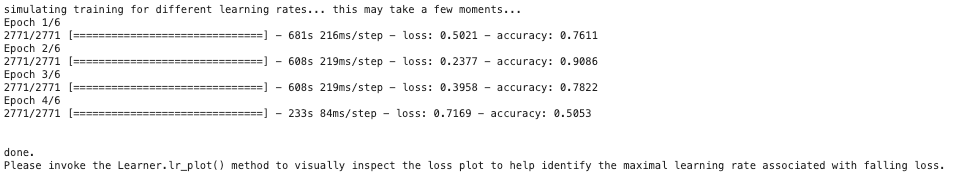

The code above works to find the opimal learning rate for the model. I have opted to not include this step, as it would increase the runtime of this session drastically. This notebook was originally completed in Google Colab, where I was able to leverage the Tesla T4 GPU. The 'learner.lr_find' function showed that a learning rate of ~1e-4 yielded the lowest loss across 6 epochs. I have included a screenshot above of the results of this step. Again, if you wish to see my full, original project, please check it out [here](https://colab.research.google.com/drive/1beGNV43zvYgbllXk_Y7lBx-BPVi5EPqH?usp=sharing).   

In [19]:
# Visualizing learning rate loss performance across epochs
#learner.lr_plot()

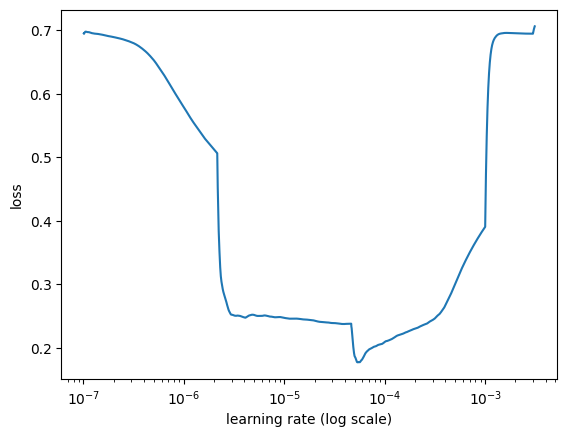

The code line above has also been commented out, as it is dependent upon the previous line. However, I have included an image of the results (again, obtained from my original work). The plot above shows us that the optimal learning rate is somewhere around 10^-4 on the log scale (1e-4). For simplicity, I have opted to use 1e-4 as the 'optimal' learning rate. This learning rate will be plugged into the final model below. 

In [20]:
# Applying optimal learning rate to model
history = learner.autofit(
    1e-4,
    checkpoint_folder = 'checkpoint',
    epochs = 10,
    early_stopping = True
)



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/10
5544/5544 [==============================] - 536s 85ms/step - loss: 0.2634 - accuracy: 0.8964 - val_loss: 0.2043 - val_accuracy: 0.9207
Epoch 2/10
5544/5544 [==============================] - 462s 83ms/step - loss: 0.1808 - accuracy: 0.9345 - val_loss: 0.2238 - val_accuracy: 0.9170
Epoch 2: early stopping
Restoring model weights from the end of the best epoch: 1.
Weights from best epoch have been loaded into model.


<a id="toc"></a>

<a href="#toc" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="toc"></a>

<a href="#7" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Next Section</a><a id="toc"></a>

<a id="6"></a>
# **Model Validation**

In [21]:
# Creating predictor and viewing metrics on validation data
predictor = ktrain.get_predictor(learner.model, preproc = preprocess)
validation = learner.validate(val_data = val, print_report = True)

154/154 [==============================] - 17s 83ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2495
           1       0.91      0.93      0.92      2433

    accuracy                           0.92      4928
   macro avg       0.92      0.92      0.92      4928
weighted avg       0.92      0.92      0.92      4928



Above we can view some performance metrics of the final model. The model had slightly higher precision for negative cases (0.93) than for positive cases (0.92). Conversely, the model had slightly higher recall for positive cases (0.93) than for negative cases (0.91). The f1-scores for positive and negative cases were 0.93 and 0.92, respectively. Lastly, the accuracy of the model was 0.92. Overall, this model performs better than the benchmark provided by the professor of this course.

<a id="toc"></a>

<a href="#toc" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="toc"></a>

<a href="#c" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Next Section</a><a id="toc"></a>

<a id="7"></a>
# **Predictions**

In [22]:
# Creating novel headlines to make predictions on
test_docs = [
'Stress May Be Your Heart’s Worst Enemy Psychological stress activates the fear center in the brain, setting into motion a cascade of reactions that can lead to heart attacks and strokes.',
'Exercising to Slim Down? Try Getting Bigger. It’s high time for women to reclaim the real strength behind exercise.',
'What Are Your Food Resolutions for the New Year? Join us for the Eat Well Challenge starting in January.',
'Why We All Need to Have More Fun. Prioritizing fun may feel impossible right now. But this four-step plan will help you rediscover how to feel more alive.',
'Cuomo Will Not Be Prosecuted in Groping Case, Albany D.A. Says. The district attorney described the woman who said former Gov. Andrew Cuomo had groped her as “credible,” but added that proving her allegation would be difficult.',
'A Film Captures Jewish Life in a Polish Town Before the Nazis Arrived. A documentary based on a home movie shot by an American in 1938 provides a look at the vibrancy of a Jewish community in Europe just before the Holocaust.'
             ]

The code chunk above creates novel headlines and short descriptions that the model can make predictions on.

In [23]:
# Making predictions on 'test_docs'
for i, text in enumerate(test_docs):
  probs = predictor.predict(text, return_proba=True)
  print("---------------------------")
  print('The probability this is healthy is %s' % probs[1])
  print(text)

---------------------------
The probability this is healthy is 0.99003017
Stress May Be Your Heart’s Worst Enemy Psychological stress activates the fear center in the brain, setting into motion a cascade of reactions that can lead to heart attacks and strokes.
---------------------------
The probability this is healthy is 0.9696658
Exercising to Slim Down? Try Getting Bigger. It’s high time for women to reclaim the real strength behind exercise.
---------------------------
The probability this is healthy is 0.946473
What Are Your Food Resolutions for the New Year? Join us for the Eat Well Challenge starting in January.
---------------------------
The probability this is healthy is 0.9350423
Why We All Need to Have More Fun. Prioritizing fun may feel impossible right now. But this four-step plan will help you rediscover how to feel more alive.
---------------------------
The probability this is healthy is 0.00588241
Cuomo Will Not Be Prosecuted in Groping Case, Albany D.A. Says. The dis

Above, we can see how the model provides probabilities for each headline being classified as 'healthy'. As a reminder, the 'healthy' label should include any news article that involves words pertaining to either wellness or healthy living.

From the results above, the model appeared to be successful in identifying 'healthy' news articles. For example, the article with the headline "Exercising to Slim Down? Try Getting Bigger" yielded a high probability of ~0.94. In this case, the model was correct, as this headline clearly involves wellness/healthy living. In contrast to this, the article with the headline "A Film Captures Jewish Life in a Polish Town Before the Nazis Arrived" yielded a low probability of ~0.002. In this case, the model was correct in not identifying this article as one that relates to wellness or healthy living.

<a id="toc"></a>

<a href="#toc" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="toc"></a>

<a href="#r" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Next Section</a><a id="toc"></a>

<a id="c"></a>
# **Conclusion**

In this project, a ktrain DistilBERT model was used for supervised text classification. The overarching goal of the project was to develop a model that would correctly identify news articles that contain language pertaining to 'health' or 'wellness'. The dataset used contained roughly 210,000 news headlines dating from 2012 to 2022. Each news article contained a category, headline, and short description. The headline and short description attributes were combined, in order to create a single column of text for each news article that the language model would use. The target categories which pertained to 'health' or 'wellness' were 'HEALTHY LIVING' and 'WELLNESS'. All news articles which fell into either of these categories were labeled as the positive class (1). All other news articles were labeled as the negative class (0). It was found that there was an extreme imbalance of classes, with only ~12% of entries being in the positive class. To remedy this, a sample of size 49,278 was taken from the original dataset in which each class made up 50% of the sample.

The initial DistilBERT model used the following parameters:
- val_df = None
- max_features = 20000
- maxlen = 128
- val_pct = 0.1
- ngram_range = 1

The maxlen value could likely be increased to 256 or 512 to potentially yield better results. However, this would made the project much more resource intensive. Future works could attempt to rerun this project with those maxlen values.

Next, learner.lr_find() was used to identify the optimal learning rate for the model. The results showed that a learning rate of roughly 1e-4 yielded the lowest loss. It should be noted that the plot shows a lower loss somewhere between 1e-4 and 1e-4.5. However, for the sake of this project, 1e-4 was sufficient. Future works could attempt to find the exact value of the optimal learning rate.

#### Model Performance: Comparison to Benchmark
(*Benchmark scores shown in italics*)

Positive Class:
- Precision --> 0.92  |  *0.85*
- Recall --> 0.93  |  *0.89*
- f1-score --> 0.93  |  *0.87*

Negative Class:
- Precision --> 0.93  |  *0.88*
- Recall --> 0.91  |  *0.84*
- f1-score --> 0.92  |  *0.86*

Accuracy:
- 0.92   |   *0.86*

In conclusion, the model created in this project outperformed the benchmark model across all metrics. For both classes, all metrics of the model exceeded 90%, suggesting that the final model is effective at correctly classifying the news articles into the appropriate classes. For real-world applications, these metrics suggest that the model may be sufficient. However, it is likely that other models may be equally effective or even superior for this supervised text classification task. One such model could be BERT. Although BERT is more resource intensive than the slimmer DistilBERT, it is likely that it would yield better results.

<a id="toc"></a>

<a href="#toc" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="r"></a>
# **References**

- ktrain: https://github.com/amaiya/ktrain
- BERT: https://arxiv.org/abs/1810.04805
- DistilBERT: https://arxiv.org/abs/1910.01108
- News Category Dataset: https://www.kaggle.com/datasets/rmisra/news-category-dataset
- News Category Dataset Author: https://rishabhmisra.github.io/publications/